In [1]:
#pkl파일 하나 살펴보기
# coding: utf-8
import sys
sys.path.append('..')

import pickle


#with open('../project2/데이터 저장용/1.pkl', 'rb') as f:
with open('../project2/데이터 저장용/기술_과학_1.pkl', 'rb') as f:
    data = pickle.load(f)
    #print(type(data))
    #print(params)
    
    title = data['dataset']['title']
    distributor = data['dataset']['distributor']
    year = data['dataset']['year']
    topic = data['dataset']['conversations'][0]['metadata']['topic']
    utterances = data['dataset']['conversations'][0]['utterances']
    

# 출력
print(f"Title: {title}")
print(f"Distributor: {distributor}")
print(f"Year: {year}")
print(f"Topic: {topic}")

# 'utterances' 관련 정보 출력
for utterance in utterances:
    print(f"Exchange ID: {utterance['exchange_id']}")
    print(f"Utterance ID: {utterance['utterance_id']}")
    print(f"Speaker ID: {utterance['speaker_id']}")
    print(f"Utterance Text: {utterance['utterance_text']}")
    print("Evaluations:")
    evaluations = utterance['utterance_evaluation']
    for eval in evaluations:
        print("Evaluations:")
        for key, value in eval.items():
            print(f"{key}: {value}")

# 텍스트만 출력
for conversation in data['dataset']['conversations']:
    for utterance in conversation['utterances']:
        print(utterance['utterance_text'])
        #print(f"Utterance Text: {utterance['utterance_text']})


Title: AI 응답 결과에 대한 품질 평가 데이터
Distributor: 한국지능정보사회진흥원
Year: 2023
Topic: 기술과학
Exchange ID: c123.e1
Utterance ID: c123.u1
Speaker ID: 313
Utterance Text: 음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.
Evaluations:
Exchange ID: c123.e1
Utterance ID: c123.u2
Speaker ID: 0
Utterance Text: 인공지능은 음악 분야에서 다양하게 활용되고 있어요. 예를 들면 국내 최초의 에이아이 작곡가 이봄이 있죠. 이봄은 음악 이론을 학습해 다양한 장르의 선율을 만들어내는데 사용되고 있어요.
Evaluations:
Evaluations:
linguistic_acceptability: yes
consistency: yes
interestingness: yes
unbias: yes
harmlessness: yes
no_hallucination: yes
understandability: yes
sensibleness: yes
specificity: yes
Evaluations:
linguistic_acceptability: yes
consistency: yes
interestingness: yes
unbias: yes
harmlessness: yes
no_hallucination: yes
understandability: yes
sensibleness: yes
specificity: yes
Evaluations:
linguistic_acceptability: yes
consistency: yes
interestingness: yes
unbias: yes
harmlessness: yes
no_hallucination: yes
understandability: yes
sensibleness: yes
specificity: yes
Exchange ID: c123.e2
Utterance ID: c123.

## 말뭉치 처리

In [2]:
import numpy as np
#import matplotlib.pyplot as plt

In [3]:
def preprocess(text):
    #text = text.lower() 
    #텍스트를 모두 소문자로 변환하여 대소문자에 상관없이 일관된 처리가 되도록 합니다. 예를 들어, "Hello"는 "hello"로 변환됩니다.
    text = text.replace('.', ' .')
    text= text.replace('.', ' ,')
    #텍스트 내에서 마침표(.)를 찾고 그 앞뒤에 공백을 추가하여 구분을 명확히 합니다. 이 코드에서는 마침표가 단어와 이어져 있을 때, 이를 구분하여 "hello.world." -> "hello world ."로 변환합니다.
    #이는 구두점도 별개의 '단어'로 처리되게 하기 위함입니다.  
    words = text.split(" ")
    #텍스트를 공백(' ')을 기준으로 나누어 단어들의 리스트를 생성합니다.
    #예시 텍스트 "hello world ."는 words가 ["hello", "world", "."]처럼 됩니다.
    """
    입력
    text: 텍스트 문자열 (예: "Hello world. This is a test.")
    출력
    corpus: 각 단어를 해당하는 ID로 변환한 배열
    word_to_id: 단어에서 ID로 매핑하는 딕셔너리
    id_to_word: ID에서 단어로 매핑하는 딕셔너리
    """
    word_to_id = {} #{"hello": 0, "world": 1, ".": 2}
    id_to_word = {} #{0: "hello", 1: "world", 2: "."}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [4]:
text =  "음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해."
       

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

In [5]:
corpus

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [6]:
word_to_id

{'음악': 0,
 '분야에서': 1,
 '인공지능이': 2,
 '어떻게': 3,
 '활용되고': 4,
 '있는지': 5,
 '궁금해': 6,
 '': 7,
 ',': 8}

In [7]:
id_to_word

{0: '음악',
 1: '분야에서',
 2: '인공지능이',
 3: '어떻게',
 4: '활용되고',
 5: '있는지',
 6: '궁금해',
 7: '',
 8: ','}

In [8]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성

    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)   #말뭉치의 크기, 즉 텍스트 내 단어의 개수를 구합니다.
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    #어휘 크기(vocab_size)만큼의 크기를 가진 0으로 채운 행렬을 생성합니다. 이 행렬의 각 원소는 단어 쌍의 동시발생 빈도를 기록합니다.
    for idx, word_id in enumerate(corpus):  #corpus에서 각 단어(ID)를 순차적으로 처리합니다. idx는 해당 단어의 인덱스이고, word_id는 단어의 고유 ID입니다.
        for i in range(1, window_size + 1): #
            left_idx = idx - i
            right_idx = idx + i
            """
            window_size에 따라 현재 단어 word_id의 왼쪽과 오른쪽 단어들과의 동시발생을 고려합니다.
            i는 윈도우 크기만큼 왼쪽과 오른쪽으로 이동하며, 그에 해당하는 단어를 찾아 동시발생을 카운트합니다.
            """
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            """
            left_idx가 0 이상의 유효한 인덱스일 경우, 왼쪽에 위치한 단어와 동시발생을 카운트합니다.
            """

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
            """
            right_idx가 말뭉치 크기보다 작은 경우, 오른쪽에 위치한 단어와 동시발생을 카운트합니다.
            """    

    return co_matrix    #최종적으로 계산된 동시발생 행렬을 반환합니다.

In [9]:
#vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

C

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출

    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)    #np.sqrt(np.sum(x ** 2))는 벡터 x의 L2 norm (크기)를 계산합니다.
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)    #eps는 0으로 나누는 오류를 방지하기 위한 작은 값입니다.
    return np.dot(nx, ny)   #내적 결과는 두 벡터의 방향성 유사도를 측정하는 값입니다. 이 값이 1에 가까울수록 두 벡터의 방향이 유사하고, 0에 가까울수록 서로 직교(유사하지 않음)하며, -1에 가까울수록 반대 방향을 의미합니다.

In [11]:
word_to_id['음악'], word_to_id['인공지능이']

(0, 2)

In [12]:
c0 = C[word_to_id['음악']]  # "음악"의 단어 벡터
c1 = C[word_to_id['인공지능이']]    # "인공지능이"의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067691154799


In [13]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색

    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [14]:
most_similar('음악', word_to_id, id_to_word, C, top=5)


[query] 음악
 인공지능이: 0.7071067691154799
 분야에서: 0.0
 어떻게: 0.0
 활용되고: 0.0
 있는지: 0.0


In [15]:
def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성

    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [16]:
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)

print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0.]]


## CBOW

In [17]:
# %load cbow_predict.py
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[ 0.175  0.432 -0.321 -0.251 -0.363  0.08  -0.281]]


| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 26 |

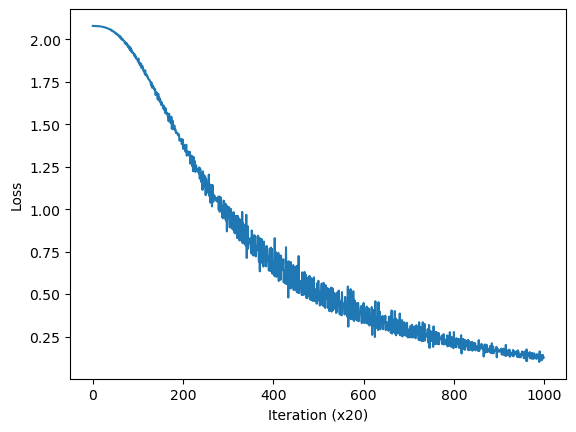

In [18]:
# %load train.py
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = '음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [19]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

음악 [-0.906  0.987  1.599  0.434 -0.668]
분야에서 [-1.592 -0.528 -1.073 -1.057  1.091]
인공지능이 [-1.271  1.668  0.803  1.093 -1.097]
어떻게 [-0.098 -1.032 -1.735 -1.299  1.328]
활용되고 [-1.086  0.075 -1.757  1.386 -1.32 ]
있는지 [ 1.682 -1.225  0.584 -1.122  1.077]
궁금해 [-0.56  -1.665 -1.105  1.054 -1.092]
. [ 0.972 -0.96   1.61  -0.686  0.657]


In [20]:
id_to_word

{0: '음악',
 1: '분야에서',
 2: '인공지능이',
 3: '어떻게',
 4: '활용되고',
 5: '있는지',
 6: '궁금해',
 7: '.'}

In [21]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['음악']]  # "음악"의 단어 벡터
c1 = word_vecs[word_to_id['인공지능이']]    # "인공지능"의 단어 벡터
print(cos_similarity(c0, c1))

0.8683656


## Skip-gram

In [22]:
# %load simple_skip_gram.py
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 4.16
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 4.15
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 4.14
| 에폭 26 |

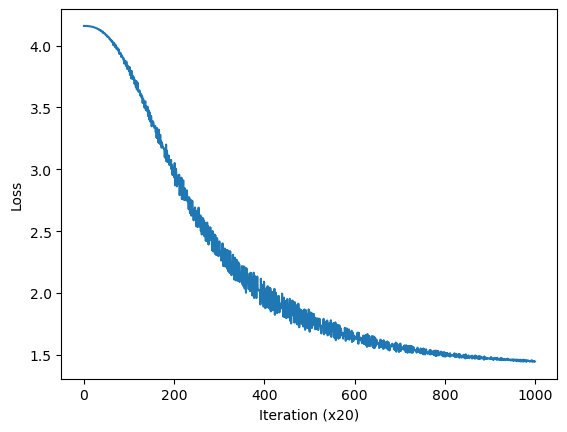

In [23]:
# %load train.py
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
# from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = '음악 분야에서 인공지능이 어떻게 활용되고 있는지 궁금해.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
#model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [24]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id]) 

음악 [ 0.001 -0.032 -0.021 -0.009  0.001]
분야에서 [-1.066 -1.056  0.896  1.099  0.96 ]
인공지능이 [ 1.132  1.102 -1.018 -1.09  -0.992]
어떻게 [-0.994  0.904 -1.042  0.907  1.447]
활용되고 [ 1.207 -0.965  0.701 -1.121 -1.063]
있는지 [-1.021  0.929 -0.967  1.049 -1.201]
궁금해 [ 0.931 -0.93   1.004 -0.891  1.304]
. [-0.002  0.008 -0.018  0.018  0.007]


In [25]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['음악']]  # "you"의 단어 벡터
c1 = word_vecs[word_to_id['인공지능이']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

-0.062728524
